In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
#from spellchecker import SpellChecker # pyspellchecker

import re, os, math, sklearn, datetime, pickle

/tmp/ipykernel_1124/3093195273.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-08 10:13:34.723012: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 10:13:34.723137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 10:13:34.819652: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable t

In [2]:
from sentence_transformers import SentenceTransformer

/home/rossnorman11/.pyenv/versions/3.10.6/envs/movie_recommendation_GPT/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_pickle('../raw_data/data_movie.pkl')

In [4]:
plot_df = df.drop_duplicates(subset='movie_id')

In [5]:
plot_df

,user_id,movie_id,rating,movie_title,plot_synopsis
0,186,302,3,L.A. Confidential,"An opening montage, narrated by Sid Hudgens (D..."
1,244,51,2,Legends of the Fall,Sick of betrayals the United States government...
2,166,346,1,Jackie Brown,"Los Angeles,1995. Jackie Brown (Pam Grier) is ..."
3,298,474,4,Dr. Strangelove or: How I Learned to Stop Worr...,At the Burpelson U.S. Air Force Base somewhere...
4,305,451,3,Grease,"In 1958, during their summer vacation, Danny Z..."
...,...,...,...,...,...
60761,456,1604,4,He Walked by Night,"On a Los Angeles street, Officer Rawlins, a pa..."
67616,181,1341,1,Hedd Wyn,As the camera pans over the intricate carving ...
68594,655,1638,3,Normal Life,"Chris (Luke Perry), a young police officer, me..."
69666,234,1460,3,Sleepover,On the last day of 8th grade before their fres...


In [6]:
model = SentenceTransformer('all-MiniLM-L6-v2')
df_ = plot_df.copy()
df_['plot_synopsis'] = df_['plot_synopsis'].apply(lambda x : model.encode(x))
df_index = df_.pop('movie_id')
df_ = df_[['plot_synopsis']]
df_ = pd.DataFrame(np.column_stack(list(zip(*df_.values))))
df_.index = df_index
df_

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
movie_id,,,,,,,,,,,,,,,,,,,,,
302,-0.006814,0.005500,-0.060920,-0.030081,-0.010516,0.021775,0.037702,0.001934,0.065264,0.002583,...,0.033443,-0.048440,-0.025668,-0.002079,-0.090100,0.003455,-0.046927,0.000065,0.029291,-0.008776
51,0.030889,-0.037635,0.058903,0.043448,0.073854,-0.030043,0.010217,-0.019481,-0.005046,0.047404,...,0.035041,-0.075679,-0.025052,0.018789,-0.078710,0.032181,0.025079,-0.059743,-0.052938,-0.091318
346,-0.068075,-0.003048,-0.140938,-0.052014,0.073610,0.045271,0.094692,0.035134,0.044287,-0.003911,...,0.058465,-0.069434,0.008165,-0.033853,-0.020143,-0.014081,0.046767,-0.035654,-0.024528,0.005482
474,-0.098339,-0.005673,-0.014967,-0.052386,0.042253,-0.024488,0.022058,0.078342,-0.048123,0.070000,...,0.039096,0.022609,-0.021548,-0.156301,0.016261,0.050124,-0.005691,-0.013234,-0.073279,0.008323
451,-0.070349,-0.043468,0.076942,-0.058550,0.060252,-0.047182,0.087284,-0.058319,0.100589,0.016833,...,-0.017866,-0.051154,-0.038770,0.066318,-0.007723,-0.012261,-0.021477,0.084415,-0.044444,-0.061698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,-0.116810,0.004466,-0.077837,-0.009782,0.128610,-0.007329,0.106352,0.022697,0.062778,0.034808,...,0.059696,-0.030960,0.004997,-0.014442,-0.080538,0.023617,-0.028271,0.067480,0.059214,-0.021359
1341,-0.013607,-0.039608,-0.075052,-0.039873,0.046908,0.020983,0.096997,0.014919,-0.031027,-0.072518,...,-0.022166,-0.040389,0.001839,0.048362,-0.039212,0.047492,0.048574,0.003705,-0.042606,-0.024249
1638,-0.049018,-0.069499,-0.051441,-0.036848,0.030912,-0.016514,0.078578,0.032482,0.054197,0.007082,...,-0.002729,-0.119408,-0.016824,-0.020688,0.024768,0.029252,0.002162,-0.011788,0.051027,-0.009197


In [7]:
user_df = df[['user_id', 'movie_id', 'rating']]

In [8]:
user_df.shape

(74230, 3)

In [9]:
user_favs = user_df.loc[df.groupby('user_id')['rating'].transform(max) == user_df['rating']]

/tmp/ipykernel_1124/195594595.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  user_favs = user_df.loc[df.groupby('user_id')['rating'].transform(max) == user_df['rating']]


In [10]:
user_favs = user_favs.drop_duplicates(subset='user_id')

In [11]:
favs_embed = pd.merge(left=user_favs, right = df_, how='left', left_on='movie_id', right_index=True)

In [12]:
favs_embed = favs_embed.drop(columns = ['movie_id', 'rating'])

In [13]:
favs_embed = favs_embed.set_index('user_id')

In [14]:
y = df['rating']/5

In [15]:
id_df = df[['user_id', 'movie_id']]

In [16]:
X_0 = pd.merge(left=id_df, right = favs_embed, how='left', left_on='user_id', right_index=True)

In [17]:
X = pd.merge(left=X_0, right = df_, how='left', left_on='movie_id', right_index=True)

In [18]:
X.shape

(74230, 770)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, shuffle=True, random_state=42)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
from tensorflow.keras import regularizers

In [22]:
user_wants = keras.Input(shape= (384,))
movie_plot = keras.Input(shape= (384,))

## Liked genres Input:
user_liked = keras.layers.Dense(32, activation= 'relu')(user_wants)
liked_dropout_1 = keras.layers.Dropout(rate=0.2)(user_liked)
liked_hidden_1 = keras.layers.Dense(16, activation= 'relu')(liked_dropout_1)

## Movie Input:
movie_input = keras.layers.Dense(32, activation= 'relu')(movie_plot)
movie_dropout_1 = keras.layers.Dropout(rate=0.2)(movie_input)
movie_hidden_1 = keras.layers.Dense(16, activation= 'relu')(movie_dropout_1)

## Merging:
merged_model = keras.layers.concatenate([liked_hidden_1, movie_hidden_1])
merged_model_hidden_1 = keras.layers.Dense(32, activation= 'relu')(merged_model)
merged_dropout_1 = keras.layers.Dropout(rate=0.2)(merged_model_hidden_1)
merged_model_hidden_2 = keras.layers.Dense(16, activation= 'relu')(merged_dropout_1)

## Output Layer:
output_rating = keras.layers.Dense(1, activation= 'sigmoid')(merged_model_hidden_2)

## Molding the Model togther:
model = keras.Model(inputs= [user_wants, movie_plot], outputs= output_rating)

## Compiling the Model:
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.001), loss= 'mean_squared_error')

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 384)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 384)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 32)                   12320     ['input_1[0][0]']             
                                                                                                  
 dense_2 (Dense)             (None, 32)                   12320     ['input_2[0][0]']             
                                                                                              

In [24]:
batch_size = 32
epochs = 30
es = EarlyStopping(patience=6, restore_best_weights=True)

history = model.fit(x= [X_train.iloc[:, 2:386], X_train.iloc[:, 386:]], 
                  y= y_train, 
                  epochs= epochs, verbose= 0, batch_size= batch_size, validation_split= 0.1, shuffle= True, callbacks = [es])


2024-02-08 10:15:35.475973: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 71829504 exceeds 10% of free system memory.
2024-02-08 10:15:35.769969: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 71829504 exceeds 10% of free system memory.


In [25]:
model.evaluate([X_test.iloc[:, 2:386], X_test.iloc[:, 386:]], y_test)

696/696 [==============================] - 2s 3ms/step - loss: 0.0376


0.03759440779685974

In [26]:
import matplotlib.pyplot as plt

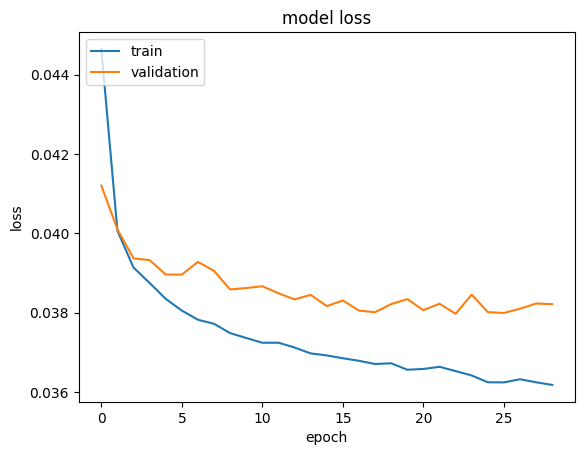

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [28]:
y_test.shape

(22269,)

In [29]:
y_baseline = np.full((22269,),3.5/5)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y_test, y_baseline)

0.048970766536440793

In [32]:
# Model 2

In [33]:
user_wants = keras.Input(shape= (384,))
movie_plot = keras.Input(shape= (384,))

## Liked genres Input:
user_liked = keras.layers.Dense(32, activation= 'relu')(user_wants)
liked_dropout_1 = keras.layers.Dropout(rate=0.2)(user_liked)
liked_hidden_1 = keras.layers.Dense(16, activation= 'relu')(liked_dropout_1)
liked_dropout_2 = keras.layers.Dropout(rate=0.2)(liked_hidden_1)
liked_hidden_2 = keras.layers.Dense(16, activation= 'relu')(liked_dropout_2)

## Movie Input:
movie_input = keras.layers.Dense(32, activation= 'relu')(movie_plot)
movie_dropout_1 = keras.layers.Dropout(rate=0.2)(movie_input)
movie_hidden_1 = keras.layers.Dense(16, activation= 'relu')(movie_dropout_1)
movie_dropout_2 = keras.layers.Dropout(rate=0.2)(movie_hidden_1)
movie_hidden_2 = keras.layers.Dense(16, activation= 'relu')(movie_dropout_2)

## Merging:
merged_model = keras.layers.concatenate([liked_hidden_2, movie_hidden_2])
merged_model_hidden_1 = keras.layers.Dense(32, activation= 'relu')(merged_model)
merged_dropout_1 = keras.layers.Dropout(rate=0.2)(merged_model_hidden_1)
merged_model_hidden_2 = keras.layers.Dense(16, activation= 'relu')(merged_dropout_1)

## Output Layer:
output_rating = keras.layers.Dense(1, activation= 'sigmoid')(merged_model_hidden_2)

## Molding the Model togther:
model_2 = keras.Model(inputs= [user_wants, movie_plot], outputs= output_rating)

## Compiling the Model:
model_2.compile(optimizer= keras.optimizers.Adam(learning_rate=0.001), loss= 'mean_squared_error')

In [34]:
batch_size = 32
epochs = 30
es = EarlyStopping(patience=6, restore_best_weights=True)

history = model_2.fit(x= [X_train.iloc[:, 2:386], X_train.iloc[:, 386:]], 
                  y= y_train, 
                  epochs= epochs, verbose= 0, batch_size= batch_size, validation_split= 0.1, shuffle= True, callbacks = [es])

2024-02-08 10:26:28.653266: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 71829504 exceeds 10% of free system memory.
2024-02-08 10:26:29.699008: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 71829504 exceeds 10% of free system memory.


In [35]:
model_2.evaluate([X_test.iloc[:, 2:386], X_test.iloc[:, 386:]], y_test)

696/696 [==============================] - 2s 3ms/step - loss: 0.0382


0.03819863498210907

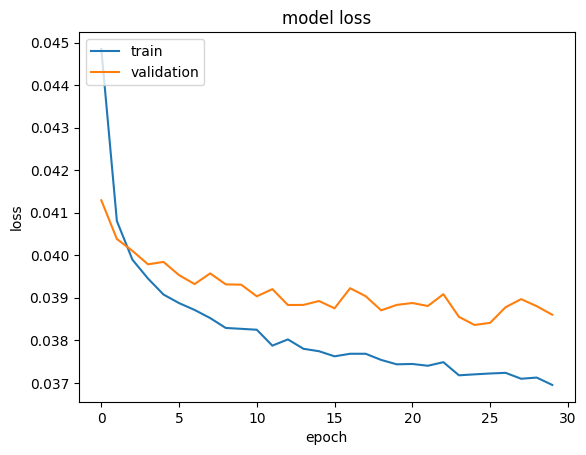

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [57]:
new_data = pd.concat([df_, favs_embed.head(1)],axis=1)

In [60]:
df_.shape

(694, 384)

In [59]:
new_prompt = favs_embed.head(1)

In [72]:
new_prompts = pd.DataFrame(np.repeat(new_prompt.values, 694, axis=0), columns=[str(i) + "_" for i in range(0,384,1)], index = df_.index)

In [73]:
new_prompts

,0_,1_,2_,3_,4_,5_,6_,7_,8_,9_,...,374_,375_,376_,377_,378_,379_,380_,381_,382_,383_
movie_id,,,,,,,,,,,,,,,,,,,,,
302,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,-0.049304,-0.010578,-0.070542,0.068142,-0.020093,0.094588,-0.016279,0.029276,0.028941,-0.047968
51,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,-0.049304,-0.010578,-0.070542,0.068142,-0.020093,0.094588,-0.016279,0.029276,0.028941,-0.047968
346,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,-0.049304,-0.010578,-0.070542,0.068142,-0.020093,0.094588,-0.016279,0.029276,0.028941,-0.047968
474,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,-0.049304,-0.010578,-0.070542,0.068142,-0.020093,0.094588,-0.016279,0.029276,0.028941,-0.047968
451,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,-0.049304,-0.010578,-0.070542,0.068142,-0.020093,0.094588,-0.016279,0.029276,0.028941,-0.047968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,-0.049304,-0.010578,-0.070542,0.068142,-0.020093,0.094588,-0.016279,0.029276,0.028941,-0.047968
1341,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,-0.049304,-0.010578,-0.070542,0.068142,-0.020093,0.094588,-0.016279,0.029276,0.028941,-0.047968
1638,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,-0.049304,-0.010578,-0.070542,0.068142,-0.020093,0.094588,-0.016279,0.029276,0.028941,-0.047968


In [76]:
new_data = pd.concat([new_prompts,df_],axis=1, join='outer')

In [77]:
new_data

,0_,1_,2_,3_,4_,5_,6_,7_,8_,9_,...,374,375,376,377,378,379,380,381,382,383
movie_id,,,,,,,,,,,,,,,,,,,,,
302,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,0.033443,-0.048440,-0.025668,-0.002079,-0.090100,0.003455,-0.046927,0.000065,0.029291,-0.008776
51,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,0.035041,-0.075679,-0.025052,0.018789,-0.078710,0.032181,0.025079,-0.059743,-0.052938,-0.091318
346,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,0.058465,-0.069434,0.008165,-0.033853,-0.020143,-0.014081,0.046767,-0.035654,-0.024528,0.005482
474,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,0.039096,0.022609,-0.021548,-0.156301,0.016261,0.050124,-0.005691,-0.013234,-0.073279,0.008323
451,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,-0.017866,-0.051154,-0.038770,0.066318,-0.007723,-0.012261,-0.021477,0.084415,-0.044444,-0.061698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,0.059696,-0.030960,0.004997,-0.014442,-0.080538,0.023617,-0.028271,0.067480,0.059214,-0.021359
1341,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,-0.022166,-0.040389,0.001839,0.048362,-0.039212,0.047492,0.048574,0.003705,-0.042606,-0.024249
1638,-0.097189,-0.055417,-0.015842,-0.039101,-0.042491,0.01836,-0.015204,0.039667,-0.005365,-0.046495,...,-0.002729,-0.119408,-0.016824,-0.020688,0.024768,0.029252,0.002162,-0.011788,0.051027,-0.009197


In [79]:
y_pred = model.predict([new_data.iloc[:, 0:384], new_data.iloc[:, 384:]])

22/22 [==============================] - 1s 6ms/step


In [89]:
ratings_pred = pd.DataFrame(y_pred, index = df_.index, columns=['ratings'])

In [92]:
ratings_sorted = ratings_pred.sort_values(by='ratings', ascending=False)

In [93]:
ratings_titles = pd.merge(left=ratings_sorted, right = plot_df[['movie_id','movie_title']], on='movie_id', how='left')

In [95]:
recommendation = ratings_titles.loc[0:5,'movie_title']

In [96]:
recommendation

0                         Casablanca
1                   Schindler's List
2                            Titanic
3                          Star Wars
4            Raiders of the Lost Ark
5    One Flew Over the Cuckoo's Nest
Name: movie_title, dtype: object

In [100]:
user = df[df['user_id'] == 286]